<a href="https://colab.research.google.com/github/PaoDeVi/T-picos-IA/blob/main/Scikit_Learn_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Regresión Lineal Simple**


In [ ]:
table = pd.read_csv('/content/drive/MyDrive/Tópicos IA/heart2.csv') #Cargado y lectura de la base de datos
table.dropna() #Eliminar filas con valores nulos (no existen en la base de datos)
table

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


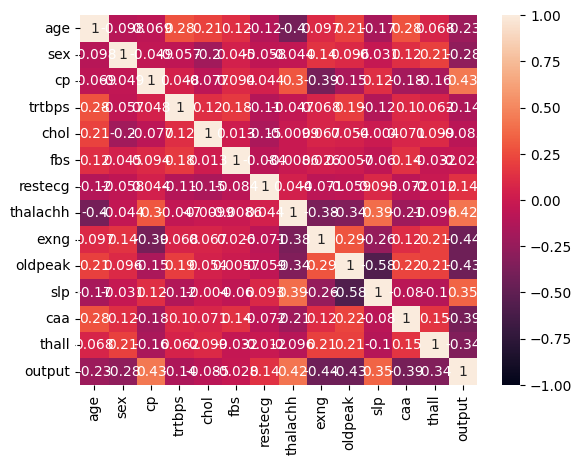

In [ ]:
matrix_corr = table.corr()
heatmap = sns.heatmap(matrix_corr, vmin=-1, vmax=1, annot=True)

In [ ]:
#Normalización de los datos
numeric_columns = table.select_dtypes(include=[np.number])

for column in numeric_columns:
      max_abs_value = table[column].abs().max()
      table[column] = (table[column] - table[column].min()) / (max_abs_value - table[column].min())

value = table.count(0)
#Primera partición en datos de entrenamiento (70%) y datos de prueba (30%)
index_70 = (value.age*70)//100
training_table = table.copy()
training_table = training_table.iloc[:index_70]
test_table = table.copy()
test_table = test_table.iloc[index_70:]

In [ ]:
#Experimento 1 70-30
value = training_table.count(0)
#partir los datos de entrenamiento en entrenamiento (70%) y validación (30%)
index_70 = (value.age*70)//100
training_table_2 = training_table.copy()
training_table_2 = training_table_2.iloc[:index_70]
validation_table = training_table.copy()
validation_table = validation_table.iloc[index_70:]

x = training_table_2['age'].values
y = training_table_2['chol'].values

In [ ]:
modelo = LinearRegression()
modelo.fit(x.reshape(-1,1),y.reshape(-1,1))

x_v = validation_table['age'].values
y_v = validation_table['chol'].values

yv_ = modelo.predict(x_v.reshape(-1,1))
error_exp1 = mean_squared_error(y_v,yv_)

print("El error cuadrático final es: ", error_exp1)

El error cuadrático final es:  0.010726880256183501


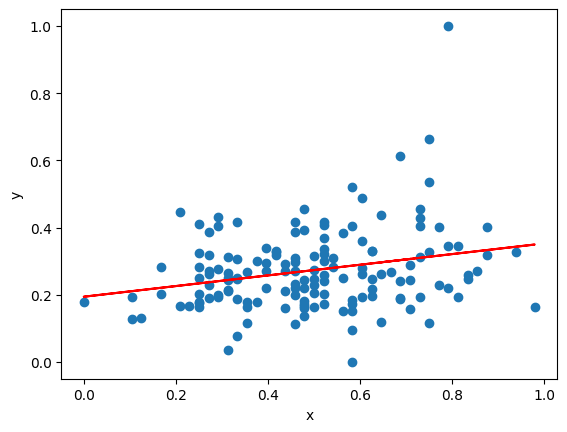

In [ ]:
y_regr = modelo.predict(x.reshape(-1,1))
plt.scatter(x,y)
plt.plot(x,y_regr,'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
#Experimento 2 60-40
value = training_table.count(0)
#Crear el 60%
index_60 = (value.age*60)//100
training_table_3 = training_table.copy()
training_table_3 = training_table_3.iloc[:index_60]
validation_table2 = training_table.copy()
validation_table2 = validation_table2.iloc[index_60:]

x2 = training_table_3['age'].values
y2 = training_table_3['chol'].values

In [ ]:
modelo2 = LinearRegression()
modelo2.fit(x2.reshape(-1,1),y2.reshape(-1,1))

x_v = validation_table2['age'].values
y_v = validation_table2['chol'].values

yv_ = modelo2.predict(x_v.reshape(-1,1))
error_exp2 = mean_squared_error(y_v.reshape(-1,1),yv_.reshape(-1,1))

print("El error cuadrático final es: ", error_exp2)

El error cuadrático final es:  0.011831675034977663


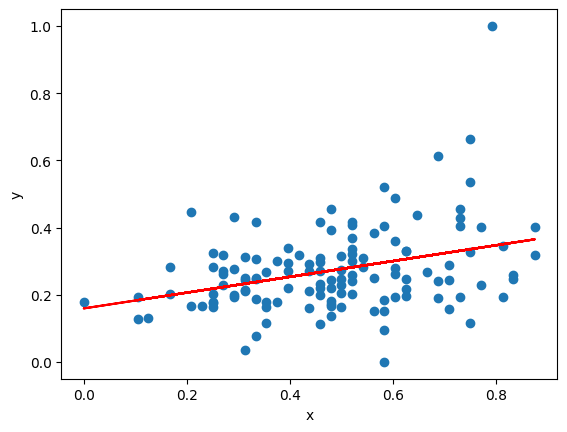

In [ ]:
y_regr = modelo2.predict(x2.reshape(-1,1))
plt.scatter(x2,y2)
plt.plot(x2,y_regr,'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
#Experimento 3  80-20
value = training_table.count(0)
#Crear el 80%
index_80 = (value.age*80)//100
training_table_4 = training_table.copy()
training_table_4 = training_table_4.iloc[:index_80]
validation_table3 = training_table.copy()
validation_table3 = validation_table3.iloc[index_80:]

x3 = training_table_4['age'].values.reshape(-1,1)
y3 = training_table_4['chol'].values

In [ ]:
modelo3 = LinearRegression()
modelo3.fit(x3,y3)

x_v = validation_table3['age'].values.reshape(-1,1)
y_v = validation_table3['chol'].values.reshape(-1,1)

yv_ = modelo3.predict(x_v)
error_exp3 = mean_squared_error(y_v,yv_)

print("El error cuadrático final es: ", error_exp3)

El error cuadrático final es:  0.010104333772559522


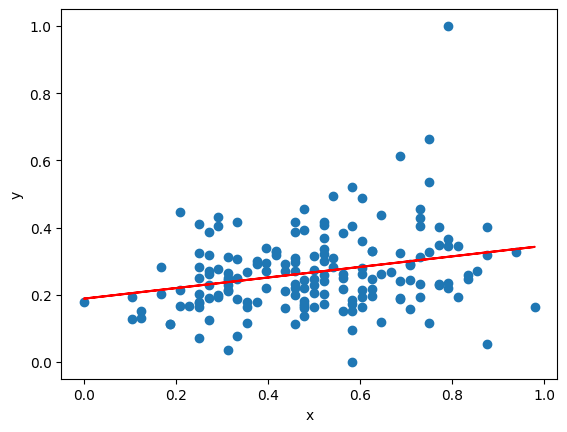

In [ ]:
y_regr = modelo3.predict(x3)
plt.scatter(x3,y3)
plt.plot(x3,y_regr,'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
if(error_exp1 < error_exp2 and error_exp1 < error_exp3):
  modelo_final = modelo
elif(error_exp2 < error_exp1 and error_exp2 < error_exp3):
  modelo_final = modelo2
else:
  modelo_final = modelo3

x_v = test_table['age'].values.reshape(-1,1)
y_v = test_table['chol'].values.reshape(-1,1)

yv_ = modelo_final.predict(x_v)
error_final = mean_squared_error(y_v,yv_)

print("El error cuadrático final es: ", error_final)

El error cuadrático final es:  0.014409689508733576


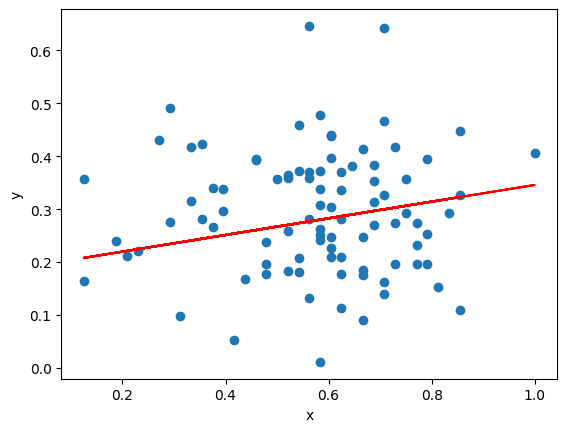

In [ ]:
plt.scatter(x_v,y_v)
plt.plot(x_v,yv_,'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

##**Regresión Lineal Multivariada**


In [ ]:
table = pd.read_csv('/content/drive/MyDrive/Tópicos IA/diabetes.csv') #Cargado y lectura de la base de datos
table = table.select_dtypes(exclude=['object'])
table.dropna() #Eliminar filas con valores nulos (no existen en la base de datos)
table

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


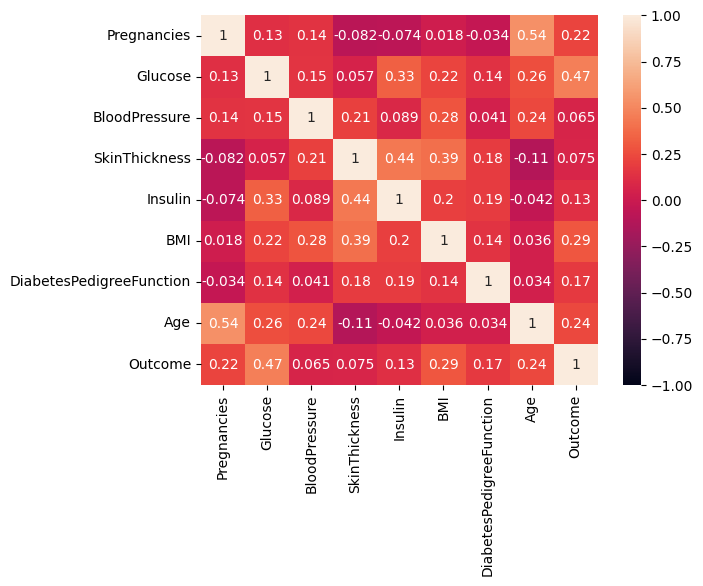

In [ ]:
matrix_corr = table.corr()
heatmap = sns.heatmap(matrix_corr, vmin=-1, vmax=1, annot=True)

In [ ]:
#Normalización de los datos
numeric_columns = table.select_dtypes(include=[np.number])

for column in numeric_columns:
      max_abs_value = table[column].abs().max()
      table[column] = (table[column] - table[column].min()) / (max_abs_value - table[column].min())

value = table.count(0)
#Primera partición en datos de entrenamiento (70%) y datos de prueba (30%)
index_70 = (value.Age*70)//100
training_table = table.copy()
training_table.insert(0, 'intercept', 1)
training_table = training_table.iloc[:index_70]
test_table = table.copy()
test_table.insert(0, 'intercept', 1)
test_table = test_table.iloc[index_70:]

#PRIMERA COMBINACIÓN

In [ ]:
#Primera Combinación Y = Blood Pressure    X =  BMI - SkinThickness - Age
#Experimento 1 70-30
value = training_table.count(0)
#partir los datos de entrenamiento en entrenamiento (70%) y validación (30%)
index_70 = (value.Age*70)//100
training_table_C1 = training_table.copy()
training_table_C1 = training_table_C1.iloc[:index_70]
validation_table_C1 = training_table.copy()
validation_table_C1 = validation_table_C1.iloc[index_70:]

X = training_table_C1[['intercept', 'BMI', 'SkinThickness', 'Age']].values
y = training_table_C1['BloodPressure'].values

In [ ]:
#Primera Combinación Y = Blood Pressure    X =  BMI - SkinThickness - Age
#Experimento 1 70-30
value = training_table.count(0)
#partir los datos de entrenamiento en entrenamiento (70%) y validación (30%)
index_70 = (value.Age*70)//100
training_table_C1 = training_table.copy()
training_table_C1 = training_table_C1.iloc[:index_70]
validation_table_C1 = training_table.copy()
validation_table_C1 = validation_table_C1.iloc[index_70:]

X = training_table_C1[['intercept', 'BMI', 'SkinThickness', 'Age']].values
y = training_table_C1['BloodPressure'].values

modelo_m = LinearRegression()
modelo_m.fit(X,y.reshape(-1,1))

X_v = validation_table_C1[['intercept', 'BMI', 'SkinThickness', 'Age']].values
y_v = validation_table_C1['BloodPressure'].values

yv_ = modelo_m.predict(X_v)
error_exp1 = mean_squared_error(y_v,yv_)

print("El error cuadrático final es: ", error_exp1)

El error cuadrático final es:  0.022658764142856214


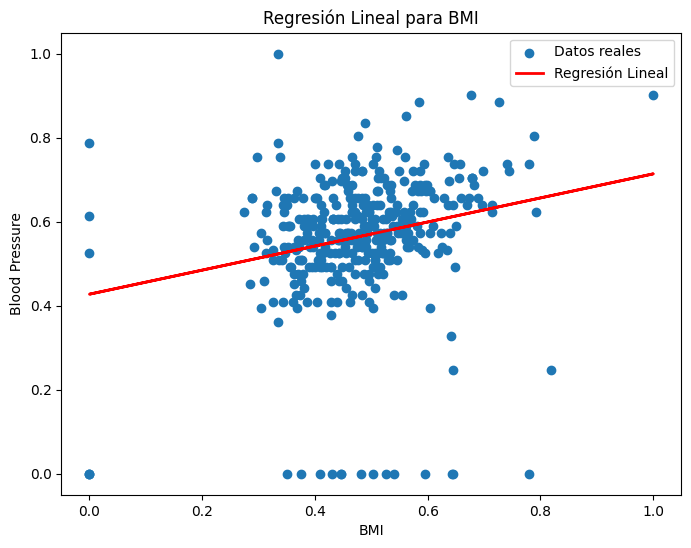

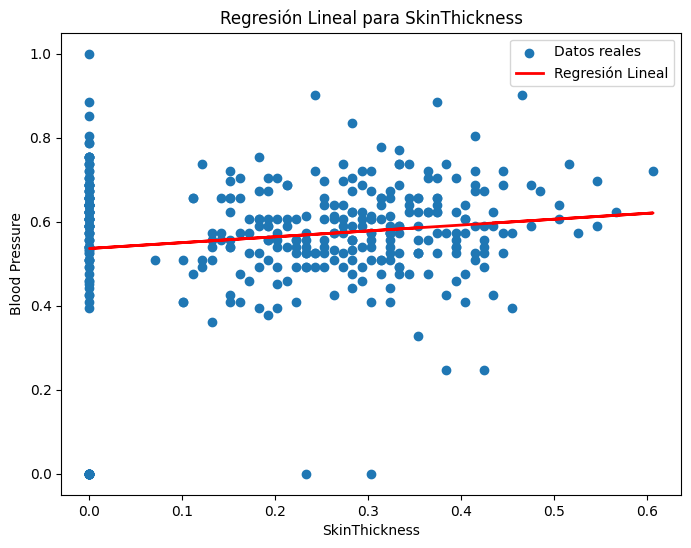

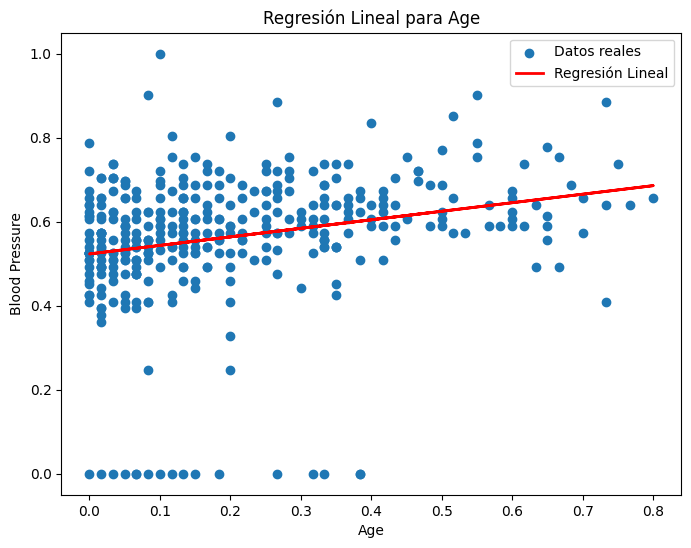

In [ ]:
features = ['BMI', 'SkinThickness', 'Age']

for feature in features:

    X_train = training_table_C1[[feature]].values
    y_train = training_table_C1['BloodPressure'].values

    modeloX = LinearRegression()
    modeloX.fit(X_train, y_train)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_train, y_train, label='Datos reales')
    plt.plot(X_train, modeloX.predict(X_train), color='red', linewidth=2, label='Regresión Lineal')
    plt.xlabel(feature)
    plt.ylabel('Blood Pressure')
    plt.title(f'Regresión Lineal para {feature}')
    plt.legend()
    plt.show()

In [ ]:
#Experimento 2 60-40
value = training_table.count(0)
#partir los datos de entrenamiento en entrenamiento (70%) y validación (30%)
index_70 = (value.Age*60)//100
training_table_C1 = training_table.copy()
training_table_C1 = training_table_C1.iloc[:index_70]
validation_table_C1 = training_table.copy()
validation_table_C1 = validation_table_C1.iloc[index_70:]

X = training_table_C1[['intercept', 'BMI', 'SkinThickness', 'Age']].values
y = training_table_C1['BloodPressure'].values

In [ ]:
modelo_m2 = LinearRegression()
modelo_m2.fit(X,y.reshape(-1,1))

X_v = validation_table_C1[['intercept', 'BMI', 'SkinThickness', 'Age']].values
y_v = validation_table_C1['BloodPressure'].values

yv_ = modelo_m2.predict(X_v)
error_exp2 = mean_squared_error(y_v,yv_)

print("El error cuadrático final es: ", error_exp2)

El error cuadrático final es:  0.025454613315537642


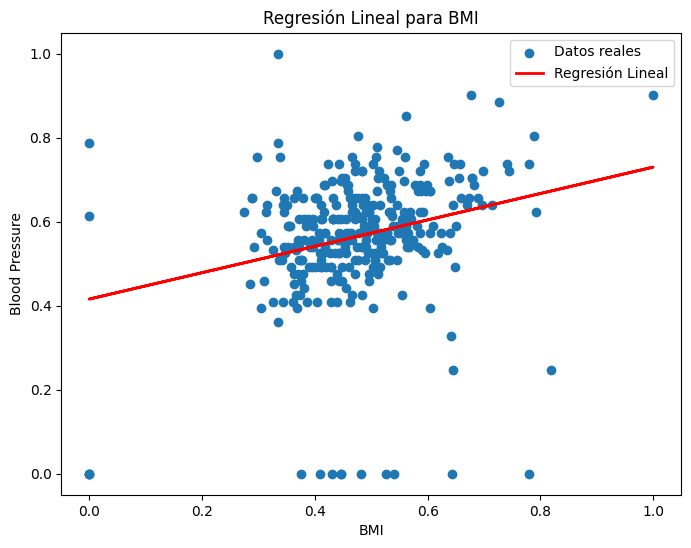

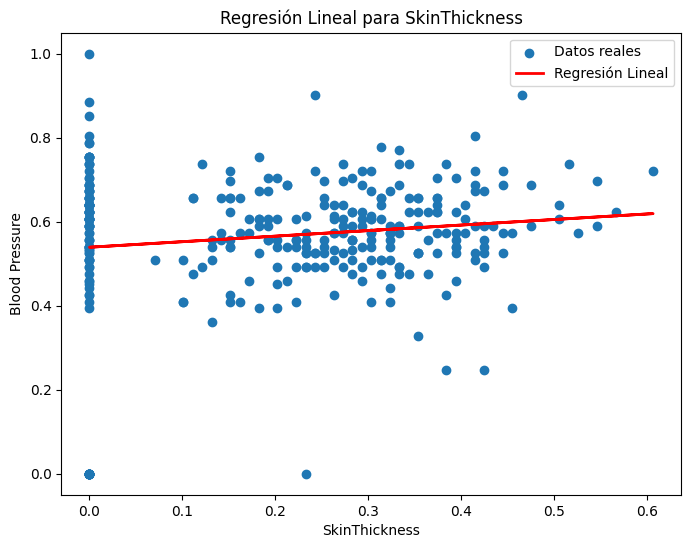

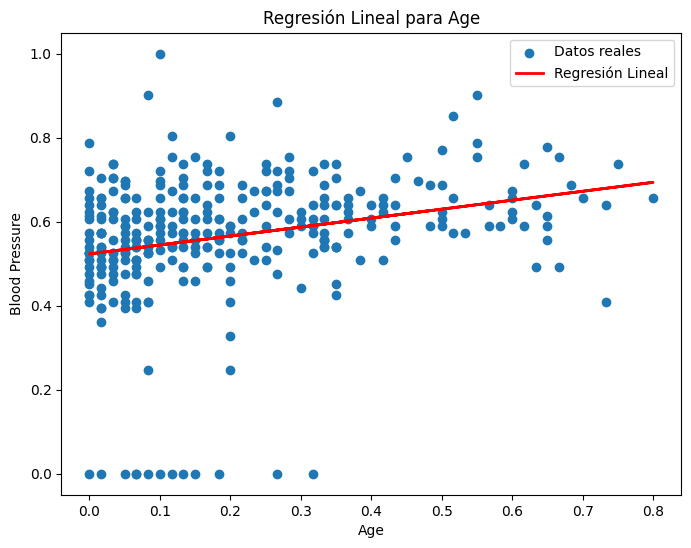

In [ ]:
features = ['BMI', 'SkinThickness', 'Age']

for feature in features:
    X_train = training_table_C1[[feature]].values
    y_train = training_table_C1['BloodPressure'].values

    modeloX = LinearRegression()
    modeloX.fit(X_train, y_train)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_train, y_train, label='Datos reales')
    plt.plot(X_train, modeloX.predict(X_train), color='red', linewidth=2, label='Regresión Lineal')
    plt.xlabel(feature)
    plt.ylabel('Blood Pressure')
    plt.title(f'Regresión Lineal para {feature}')
    plt.legend()
    plt.show()

In [ ]:
#Experimento 2 80-20
value = training_table.count(0)
#partir los datos de entrenamiento en entrenamiento (70%) y validación (30%)
index_70 = (value.Age*80)//100
training_table_C1 = training_table.copy()
training_table_C1 = training_table_C1.iloc[:index_70]
validation_table_C1 = training_table.copy()
validation_table_C1 = validation_table_C1.iloc[index_70:]

X = training_table_C1[['intercept', 'BMI', 'SkinThickness', 'Age']].values
y = training_table_C1['BloodPressure'].values

In [ ]:
modelo_m3 = LinearRegression()
modelo_m3.fit(X,y.reshape(-1,1))

X_v = validation_table_C1[['intercept', 'BMI', 'SkinThickness', 'Age']].values
y_v = validation_table_C1['BloodPressure'].values

yv_ = modelo_m3.predict(X_v)
error_exp3 = mean_squared_error(y_v,yv_)

print("El error cuadrático final es: ", error_exp3)
print(modelo_m3.coef_)
print(modelo_m3.intercept_)


El error cuadrático final es:  0.02888375697292714
[[0.         0.24395075 0.12450092 0.19945409]]
[0.38433932]


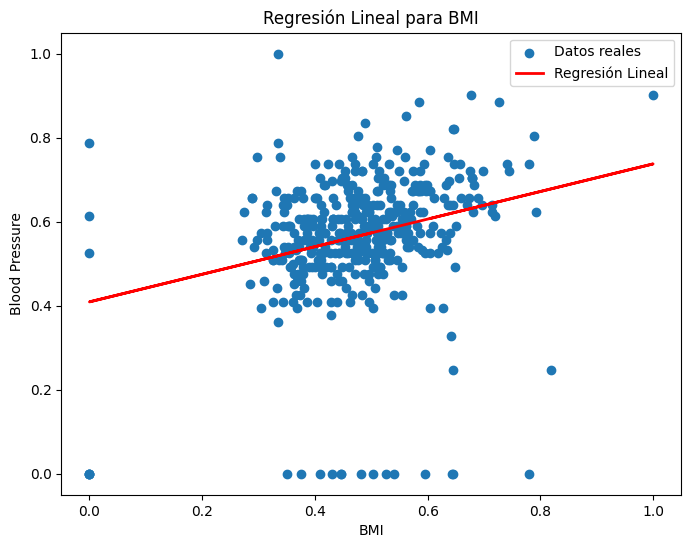

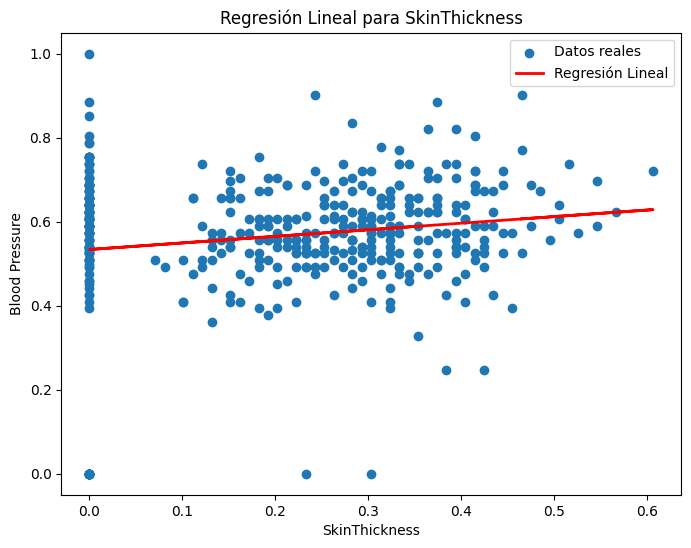

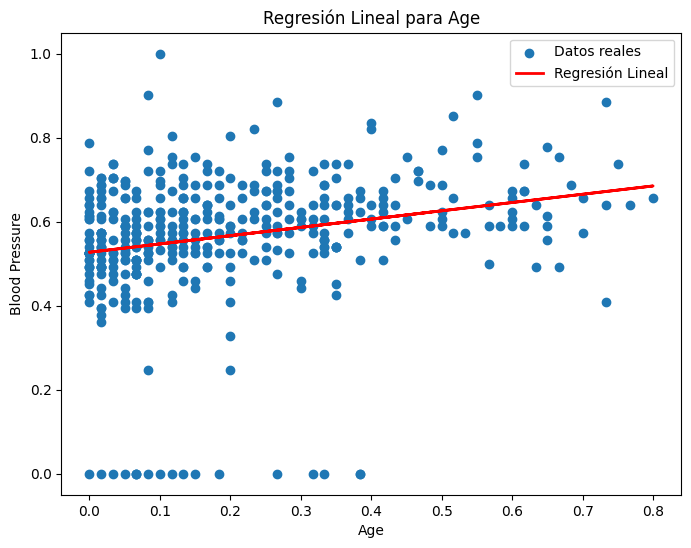

In [ ]:
features = ['BMI', 'SkinThickness', 'Age']

for feature in features:

    X_train = training_table_C1[[feature]].values
    y_train = training_table_C1['BloodPressure'].values

    modeloX = LinearRegression()
    modeloX.fit(X_train, y_train)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_train, y_train, label='Datos reales')
    plt.plot(X_train, modeloX.predict(X_train), color='red', linewidth=2, label='Regresión Lineal')
    plt.xlabel(feature)
    plt.ylabel('Blood Pressure')
    plt.title(f'Regresión Lineal para {feature}')
    plt.legend()
    plt.show()

In [ ]:
if(error_exp1 < error_exp2 and error_exp1 < error_exp3):
  modelo_final = modelo_m
elif(error_exp2 < error_exp1 and error_exp2 < error_exp3):
  modelo_final = modelo_m2
else:
  modelo_final = modelo_m3

x_v = test_table[['intercept', 'BMI', 'SkinThickness', 'Age']].values
y_v = test_table['BloodPressure'].values

yv_ = modelo_final.predict(x_v)
error_final = mean_squared_error(y_v,yv_)

print("El error cuadrático final es: ", error_final)

El error cuadrático final es:  0.019170541162999766


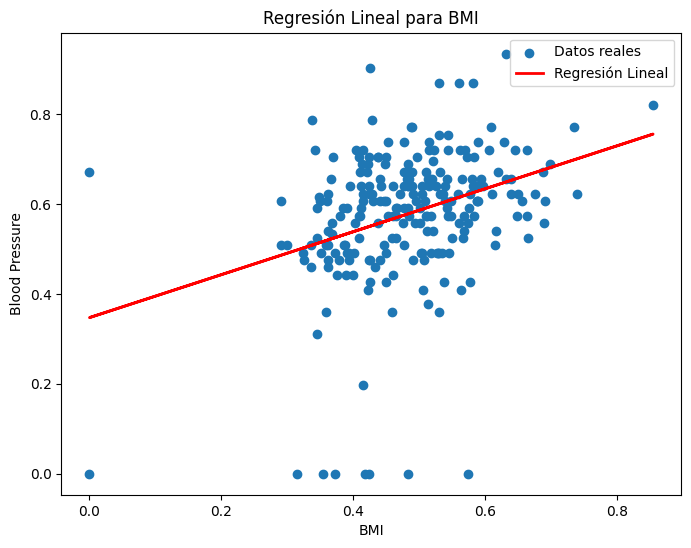

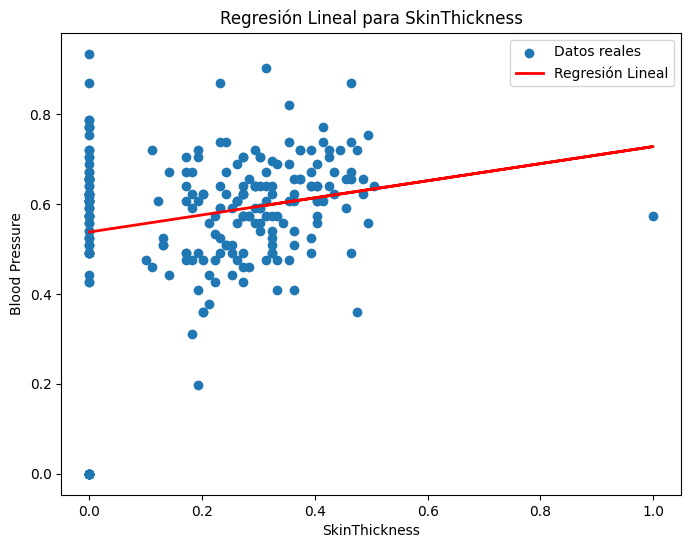

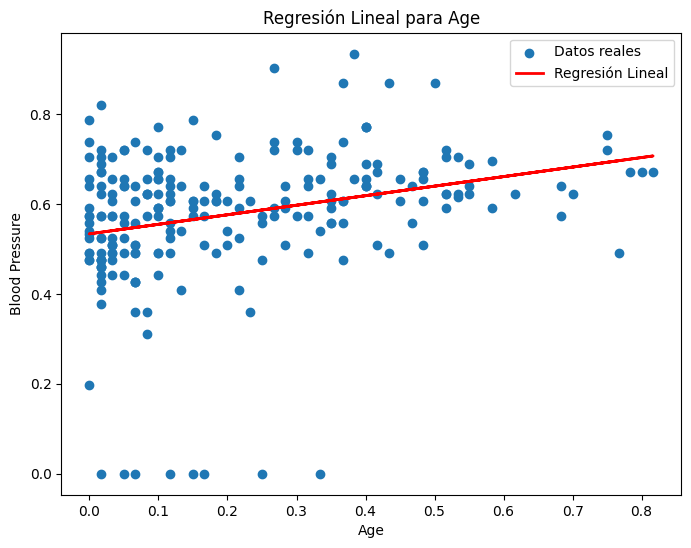

In [ ]:
features = ['BMI', 'SkinThickness', 'Age']

for feature in features:
    X_train = test_table[[feature]].values
    y_train = test_table['BloodPressure'].values

    modeloX = LinearRegression()
    modeloX.fit(X_train, y_train)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_train, y_train, label='Datos reales')
    plt.plot(X_train, modeloX.predict(X_train), color='red', linewidth=2, label='Regresión Lineal')
    plt.xlabel(feature)
    plt.ylabel('Blood Pressure')
    plt.title(f'Regresión Lineal para {feature}')
    plt.legend()
    plt.show()

#SEGUNDA COMBINACIÓN

In [ ]:
#Primera Combinación Y = Blood Pressure    X =  BMI - SkinThickness - Age
#Experimento 1 70-30
value = training_table.count(0)
#partir los datos de entrenamiento en entrenamiento (70%) y validación (30%)
index_70 = (value.Age*70)//100
training_table_C1 = training_table.copy()
training_table_C1 = training_table_C1.iloc[:index_70]
validation_table_C1 = training_table.copy()
validation_table_C1 = validation_table_C1.iloc[index_70:]

X = training_table_C1[['intercept', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']].values
y = training_table_C1['Insulin'].values

In [ ]:
modelo_m = LinearRegression()
modelo_m.fit(X,y.reshape(-1,1))

X_v = validation_table_C1[['intercept', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']].values
y_v = validation_table_C1['Insulin'].values

yv_ = modelo_m.predict(X_v)
error_exp1 = mean_squared_error(y_v,yv_)

print("El error cuadrático final es: ", error_exp1)

El error cuadrático final es:  0.01415655080376338


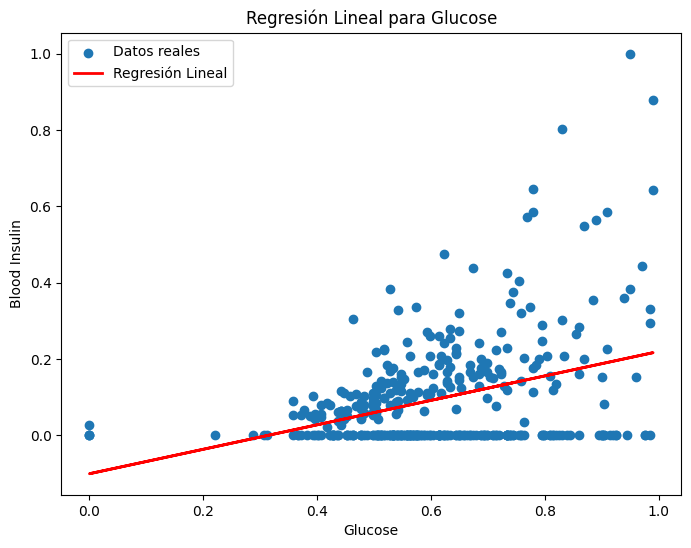

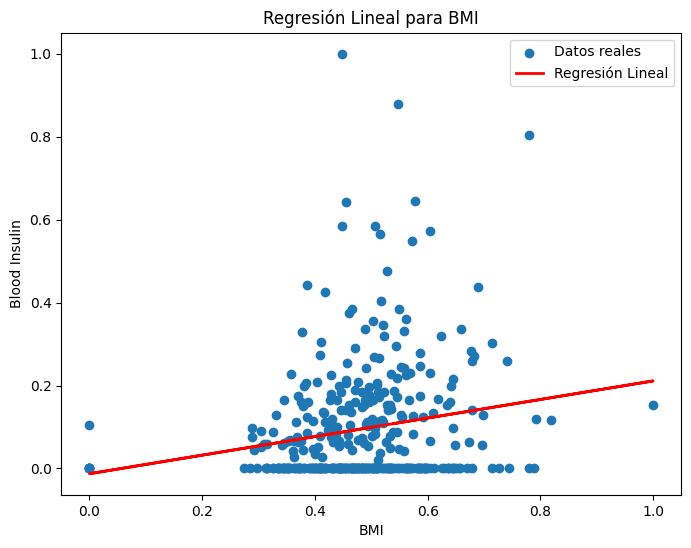

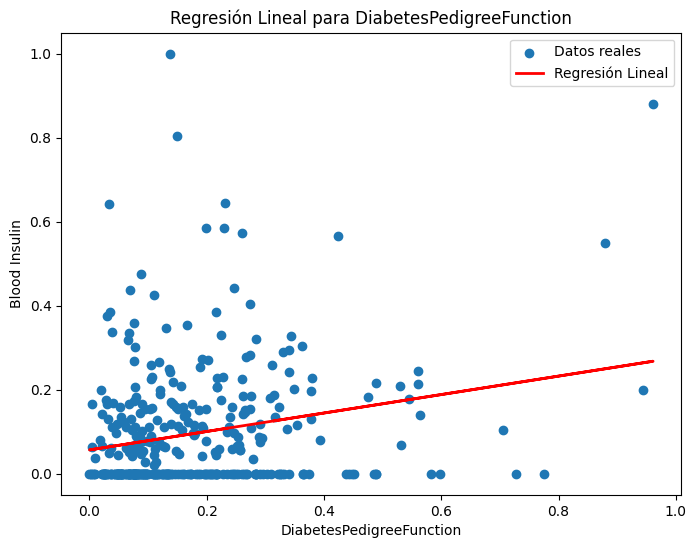

In [ ]:
features = [ 'Glucose', 'BMI', 'DiabetesPedigreeFunction']

for feature in features:

    X_train = training_table_C1[[feature]].values
    y_train = training_table_C1['Insulin'].values

    modeloX = LinearRegression()
    modeloX.fit(X_train, y_train)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_train, y_train, label='Datos reales')
    plt.plot(X_train, modeloX.predict(X_train), color='red', linewidth=2, label='Regresión Lineal')
    plt.xlabel(feature)
    plt.ylabel('Blood Insulin')
    plt.title(f'Regresión Lineal para {feature}')
    plt.legend()
    plt.show()

In [ ]:
#Experimento 1 60-40
value = training_table.count(0)
#partir los datos de entrenamiento en entrenamiento (60%) y validación (40%)
index_70 = (value.Age*60)//100
training_table_C1 = training_table.copy()
training_table_C1 = training_table_C1.iloc[:index_70]
validation_table_C1 = training_table.copy()
validation_table_C1 = validation_table_C1.iloc[index_70:]

X = training_table_C1[['intercept', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']].values
y = training_table_C1['Insulin'].values

In [ ]:
modelo_m2 = LinearRegression()
modelo_m2.fit(X,y.reshape(-1,1))

X_v = validation_table_C1[['intercept', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']].values
y_v = validation_table_C1['Insulin'].values

yv_ = modelo_m2.predict(X_v)
error_exp2 = mean_squared_error(y_v,yv_)

print("El error cuadrático final es: ", error_exp2)

El error cuadrático final es:  0.013139963216204914


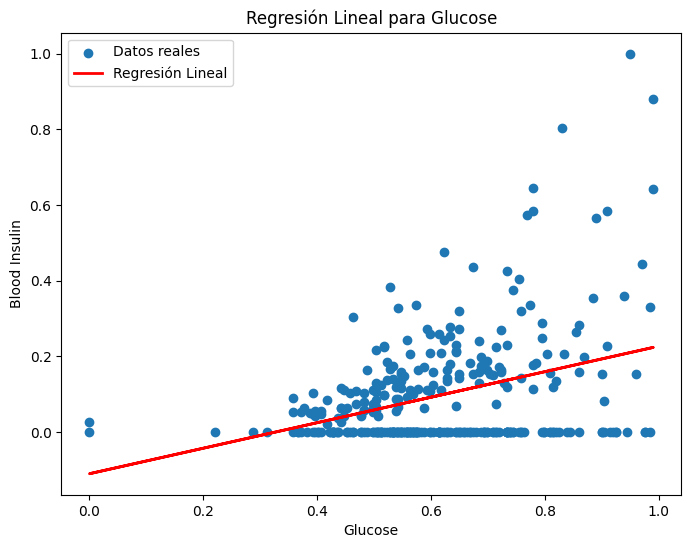

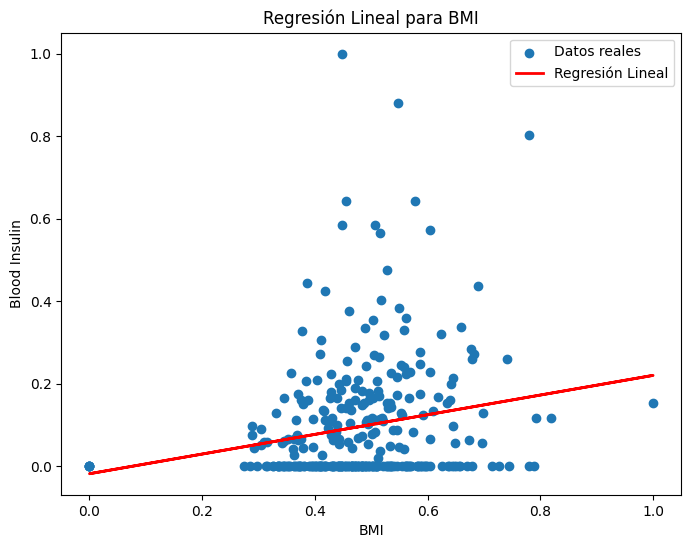

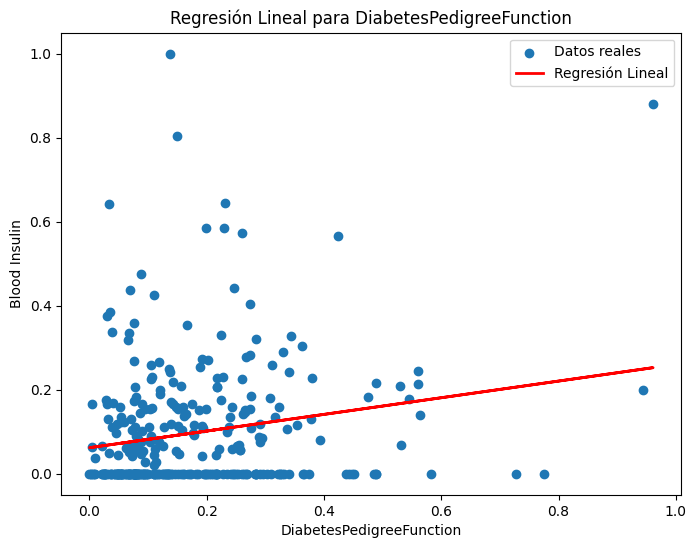

In [ ]:
features = [ 'Glucose', 'BMI', 'DiabetesPedigreeFunction']

for feature in features:

    X_train = training_table_C1[[feature]].values
    y_train = training_table_C1['Insulin'].values

    modeloX = LinearRegression()
    modeloX.fit(X_train, y_train)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_train, y_train, label='Datos reales')
    plt.plot(X_train, modeloX.predict(X_train), color='red', linewidth=2, label='Regresión Lineal')
    plt.xlabel(feature)
    plt.ylabel('Blood Insulin')
    plt.title(f'Regresión Lineal para {feature}')
    plt.legend()
    plt.show()

In [ ]:
#Experimento 1 80-20
value = training_table.count(0)
#partir los datos de entrenamiento en entrenamiento (80%) y validación (20%)
index_70 = (value.Age*80)//100
training_table_C1 = training_table.copy()
training_table_C1 = training_table_C1.iloc[:index_70]
validation_table_C1 = training_table.copy()
validation_table_C1 = validation_table_C1.iloc[index_70:]

X = training_table_C1[['intercept', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']].values
y = training_table_C1['Insulin'].values

In [ ]:
modelo_m3 = LinearRegression()
modelo_m3.fit(X,y.reshape(-1,1))

X_v = validation_table_C1[['intercept', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']].values
y_v = validation_table_C1['Insulin'].values

yv_ = modelo_m3.predict(X_v)
error_exp3 = mean_squared_error(y_v,yv_)

print("El error cuadrático final es: ", error_exp3)

El error cuadrático final es:  0.010900336532055573


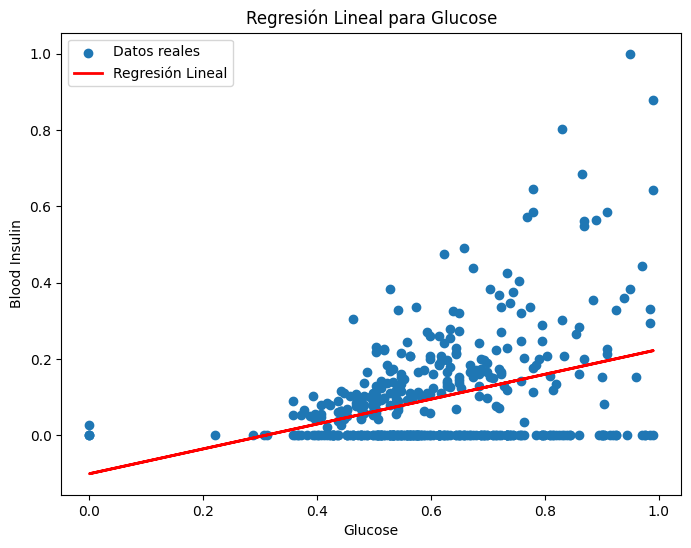

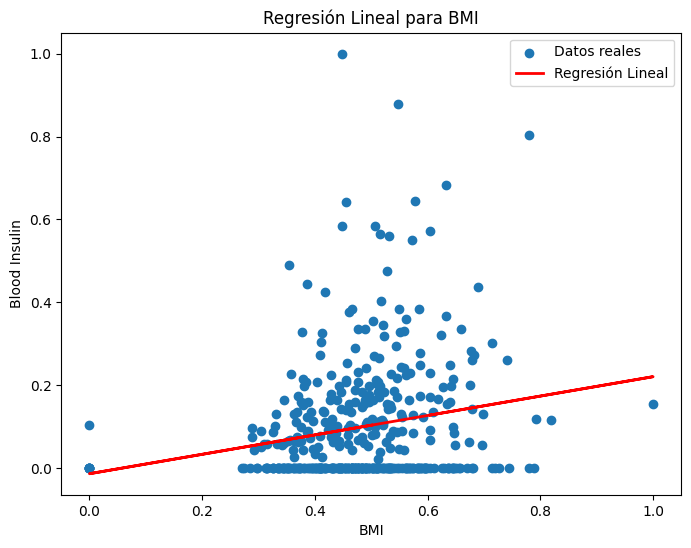

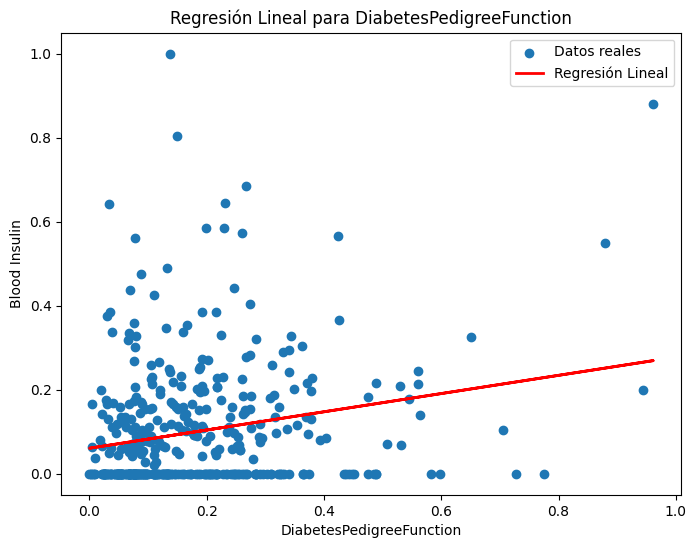

In [ ]:
features = [ 'Glucose', 'BMI', 'DiabetesPedigreeFunction']

for feature in features:

    X_train = training_table_C1[[feature]].values
    y_train = training_table_C1['Insulin'].values

    modeloX = LinearRegression()
    modeloX.fit(X_train, y_train)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_train, y_train, label='Datos reales')
    plt.plot(X_train, modeloX.predict(X_train), color='red', linewidth=2, label='Regresión Lineal')
    plt.xlabel(feature)
    plt.ylabel('Blood Insulin')
    plt.title(f'Regresión Lineal para {feature}')
    plt.legend()
    plt.show()

In [ ]:
if(error_exp1 < error_exp2 and error_exp1 < error_exp3):
  modelo_final = modelo_m
elif(error_exp2 < error_exp1 and error_exp2 < error_exp3):
  modelo_final = modelo_m2
else:
  modelo_final = modelo_m3

x_v = test_table[['intercept', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']].values
y_v = test_table['Insulin'].values

yv_ = modelo_final.predict(x_v)
error_final = mean_squared_error(y_v,yv_)

print("El error cuadrático final es: ", error_final)

El error cuadrático final es:  0.015248980581045306


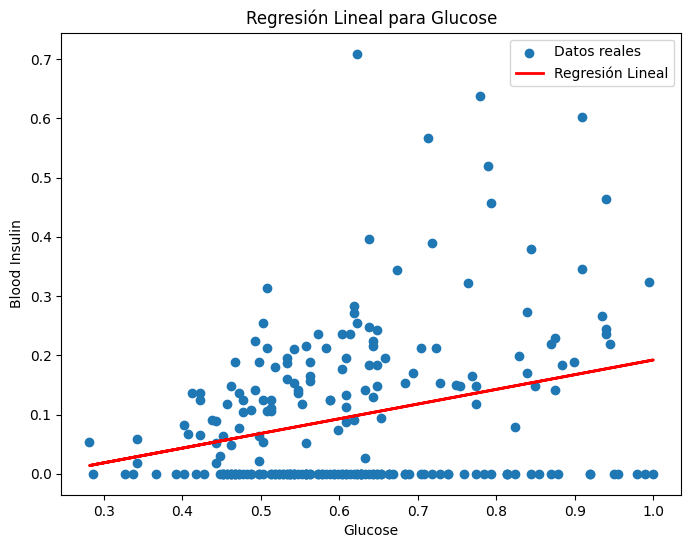

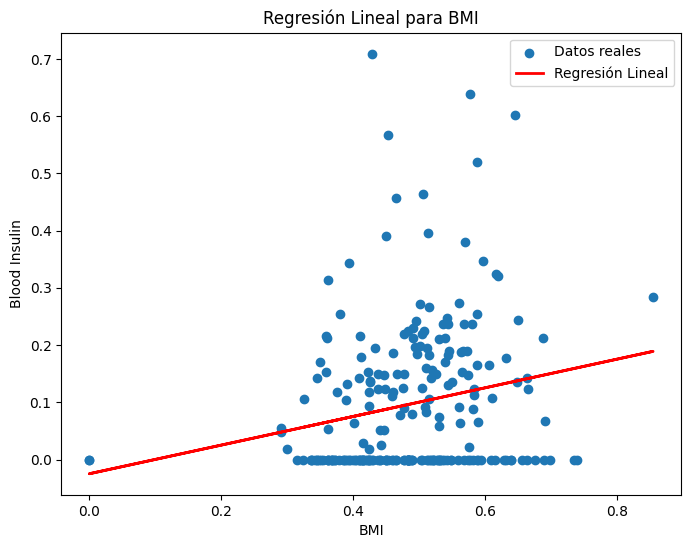

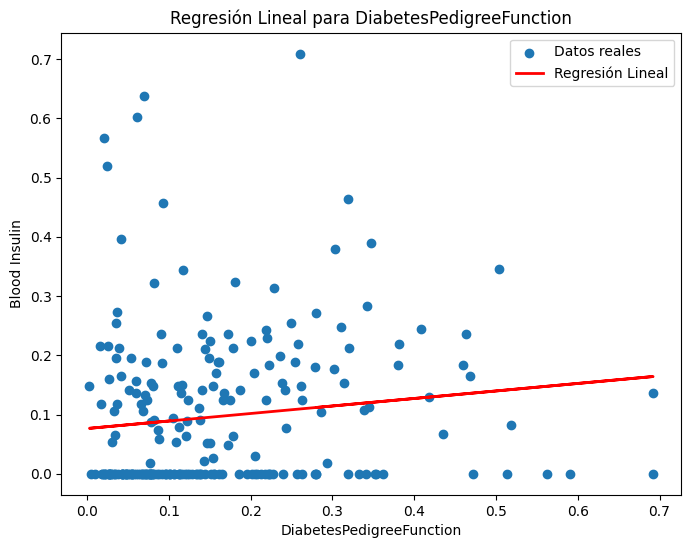

In [ ]:
features = ['Glucose', 'BMI', 'DiabetesPedigreeFunction']

for feature in features:

    X_train = test_table[[feature]].values
    y_train = test_table['Insulin'].values

    modeloX = LinearRegression()
    modeloX.fit(X_train, y_train)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_train, y_train, label='Datos reales')
    plt.plot(X_train, modeloX.predict(X_train), color='red', linewidth=2, label='Regresión Lineal')
    plt.xlabel(feature)
    plt.ylabel('Blood Insulin')
    plt.title(f'Regresión Lineal para {feature}')
    plt.legend()
    plt.show()